<h1 style="text-align: center; background-color: #2E86C1;"> Predicting and Preventing <b>Customer Churn</b> in the Telecommunications Industry</h1>

# Business Understanding

**1. Context**

The telecommunications (telco) industry has developed rapidly in the 20th century. There are so many companies have been working in this business sector. Therefore the competition is always going to be there. Because of this high competition, telco companies have always improved and evaluated their service quality to succeed and not be taken over by competitors.

Customers are the most important asset for a company. It is the main focus of the business. A company usually puts in a big effort to get customers in the initial phase of building the company. Only After they gain the customer's trust, their business can continue to live on. But the work continues beyond there. They have to keep their existing customers to continue using their service and it is a challenging task.

Customer churn is a customers stop using a service, either they don't need the service anymore or they change to another service provider. Acquiring a new customer is far more expensive than retaining the existing ones. Even an [article](https://mailchimp.com/resources/customer-churn/) says that *"Acquiring a new customer can cost a business 5x more than retaining an existing one"*. Therefore, customer churn is a critical factor for sustaining long-term profitability.

**2. Problem Statement**

In order to keep their customers, telco company usually have plenty of prevention strategies such as personalized offers, customer engagement, feedback mechanism, and much more. A company usually allocate a budget to do these campaign. It is crucial to manage this budget, so it gets into the right hands. 

In this modern era, data has become an essential part of the business. Data can provide a lot of benefit to the company. It can help a company to understand their customers and condition around them. Also it can help company to spot a potential customer churn. By targeting the right customers, the company can maximize their budget by allocating it to the customers that potential to churn.

In this project we will use historical data of certain telco company consisting of almost 5000 rows and 11 columns with column that state if the customer is churning or not. This project aim to identify current customers who's likely to churn by loking at historical data. **A predictive solution leveraging data analytics and machine learning** can help us to identify these at-risk customers and optimize promotional strategies.

**3. Goal**

The purpose of this project are to:
- Analyze factors that influence a customer to churn
- Make a machine learning model to predict whether a customer will churn or not
- Deploy the corresponding model to cloud

**4. Analytical Approach**

We will take a look at the data by doing some exploratory data analysis (EDA) in hope to uncover the truth that still yet to be uncovered. By looking at several information provided from the data that might potentially have a correlation with churning customers. In the end, we will make several action recommendation based on insight being spotted while doing the data analysis process.

**5. Metric Evaluation**

Here we define the positive class as a churn customers with this detail.
- False Positive (FP): Predict a customer will churn, while it is not
- False Negative (FN): Predict a customer will not churn, while it is churn

Giving false prediction will result in these costs.
- FP cost: Waste of promotional budget
- FN cost: Lost of customers

This projects aims to spot as many potential churn as possible. We knew that acquiring a new customer is far more expensive than retaining the existing ones. Recall will be the metric that suit our interest. But, because we want to maximize the budget that are going to be spend to offer promotions to customers. We are going to take a little bit of concern to the model precision. 

To have a good measure of this, we will use the **F2-score** that give specific weight (4:1) to recall and precision. To better understand this metric, take a look at the equation below (Betha=2)

<div>
<img src="assets\fb-score.png" width="500"/>
</div>

# Data Preparation

In [3]:
# Importing the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures, FunctionTransformer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, chi2, mutual_info_classif, RFE
from imblearn.under_sampling import RandomUnderSampler
from imblearn import under_sampling
from imblearn.over_sampling import SMOTE, SMOTEN, SMOTENC, RandomOverSampler, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.ensemble import RUSBoostClassifier, EasyEnsembleClassifier, BalancedBaggingClassifier, BalancedRandomForestClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

from sklearn.metrics import classification_report, confusion_matrix, fbeta_score, make_scorer, roc_curve

import pickle
import shap
from lime import lime_tabular

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None

In [4]:
df = pd.read_csv('data/data_telco_customer_churn.csv')
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


There are 4930 rows with 11 columns within the data. Target variable will be the "Churn" column, so there are 10 features exists with 8 qualitative and 2 quantitative features.

# Data Cleaning

We will do several data cleaning process to make a better use of the data.

**Duplication**

In [5]:
print(f'duplication: {df.duplicated().sum()} ({round(df.duplicated().sum()/len(df) * 100, 2)}%)')

duplication: 77 (1.56%)


In [6]:
df[df.duplicated()]['Churn'].value_counts()

Churn
No     49
Yes    28
Name: count, dtype: int64

In [7]:
df.drop_duplicates(inplace=True, ignore_index=True)

There're 77 duplicated data or 1.56% from totals. These values are dropped to make the ML model perform better.

**Missing & negative values**

In [8]:
def check_df(df):
    df = pd.DataFrame({
        'feature':df.columns.values,
        'data_type':df.dtypes.values,
        'null':df.isna().mean().values * 100,
        'negative':[True if df[i].dtype == int and (df[i] < 0).any() else False for i in df.columns],
        'n_unique':df.nunique().values,
        'sample_unique':[df[i].unique() for i in df.columns]
    })
    return df
check_df(df)

,feature,data_type,null,negative,n_unique,sample_unique
0,Dependents,object,0.0,False,2,"[Yes, No]"
1,tenure,int64,0.0,False,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,object,0.0,False,3,"[No, Yes, No internet service]"
3,OnlineBackup,object,0.0,False,3,"[No, Yes, No internet service]"
4,InternetService,object,0.0,False,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,0.0,False,3,"[Yes, No internet service, No]"
6,TechSupport,object,0.0,False,3,"[Yes, No, No internet service]"
7,Contract,object,0.0,False,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,0.0,False,2,"[Yes, No]"
9,MonthlyCharges,float64,0.0,False,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


There are no missing values and no negative values found from the data.

**Grouping columns based on it data types (Qualitative/Quantitative)**

In [9]:
# Group column names based on two category: qualitative & quantitative
quali_columns = list(df.select_dtypes(include=['object']).columns)
quanti_columns = list(df.select_dtypes(include=['int', 'float']).columns)
target = 'Churn'
quali_columns.remove(target) # Target variable
print(f"Qualitative column ({len(quali_columns)}): {quali_columns}")
print(f"Quantitative column ({len(quanti_columns)}): {quanti_columns}")
print(f'Target variable: {target}')

Qualitative column (8): ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']
Quantitative column (2): ['tenure', 'MonthlyCharges']
Target variable: Churn


**Check qualitative features**

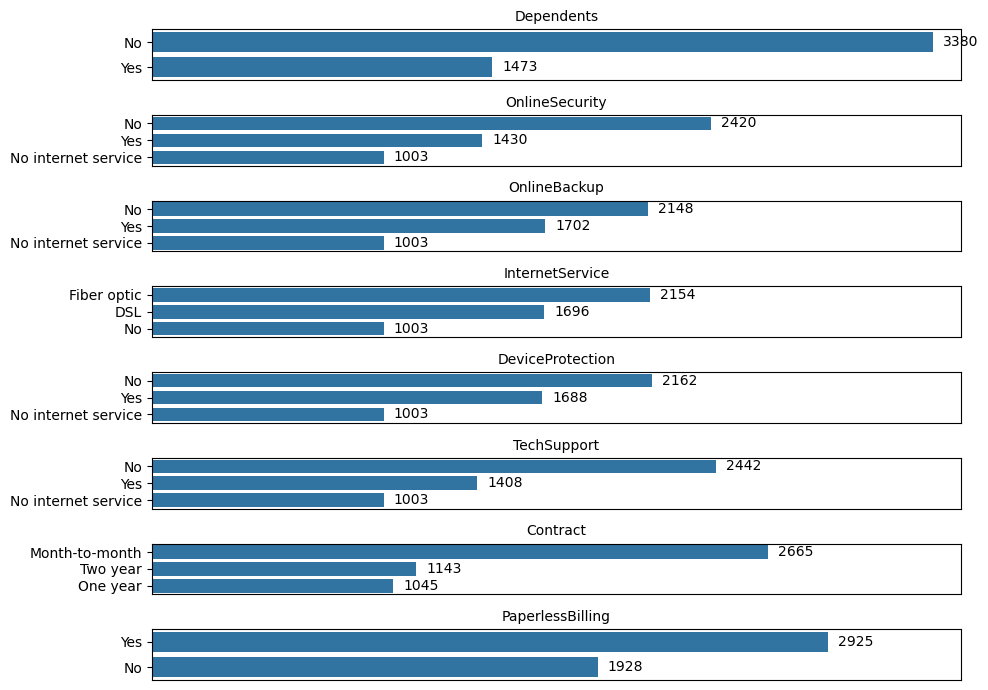

In [10]:
fig, ax = plt.subplots(len(quali_columns), 1,figsize=(10,7))
plt.subplots_adjust(hspace=0.5)
for i, feature in enumerate(quali_columns):
    top_5_values = list(df[feature].value_counts().head(5).index)
    temp_df = df[df[feature].isin(top_5_values)]
    plot = sns.countplot(data=temp_df, y=feature, ax=ax[i], order=temp_df[feature].value_counts().index)
    ax[i].set_xlabel(None)
    ax[i].set_xticks([])
    ax[i].set_ylabel(None)
    ax[i].set_title(feature, fontsize=10)
    ax[i].set_xlim(0, 3500)
    for p in plot.patches:
        plot.annotate(format(p.get_width(), '.0f'),
                      (p.get_width(),  p.get_y() + p.get_height() / 2.),
                      ha='center',
                      va='center',
                      xytext=(20,0),
                      textcoords='offset points')
plt.tight_layout()
plt.show()

Insight:
- Dependents: The number of customer who doesn't have dependent (3380) are twice larger than the one who have dependent (1473)
- Internet Service: Customers who don't take internet service (1003) is automatically not takes online security, online backup, device protection, tech support (labelled as 'No internet service' in those columns). The others are customer using fiber optic (2154) and DSL/digital subscriber line (1696)
- Online security, online backup, device protection, tech support: In general, the customers doesn't have these service rather than the ones who have. The ratio is about 4:3
- Contract: Mostly they're month-to-month customers (2665). The others are two year (1143) and one year (1045) customers
- Paperless billing: Around 3/5 customers using a paperless billings (2925)

**Check quantitative features**

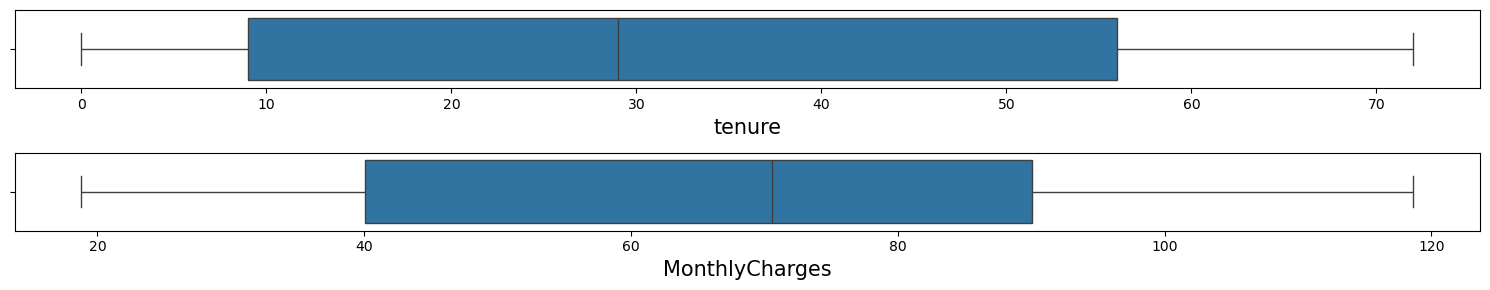

In [11]:
def quantitative_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(15,3))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers, hue=segment_feature, palette=['red','grey'])
            # ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_xlabel(feature, fontsize=15)
    plt.tight_layout()
    plt.show()
 
quantitative_dis_plot(
    features=quanti_columns,
    df=df
)

There are no outliers in quantitative columns

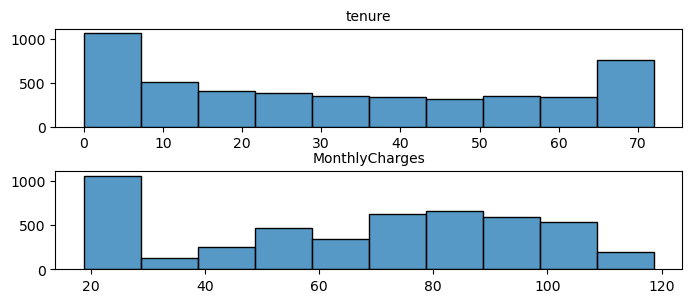

In [12]:
fig, ax = plt.subplots(len(quanti_columns), 1,figsize=(7,3))
plt.tight_layout()
for i, feature in enumerate(quanti_columns):
    sns.histplot(data=df, x=feature, ax=ax[i], bins=10)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].set_title(feature, fontsize=10)
plt.show()

Insight:
- Tenure: Number of customers based on tenure are peaked in the low value (below 10) and high value (above 65) 
- Monthly charges: Number of customers based on monthly charges are peaked in low value (below 30)

In [13]:
# Save cleaned data
df.to_csv('data/telco_customer_churn_cleaned.csv', index=None)

# Exploratory Data Analysis

**Target variable proportion**

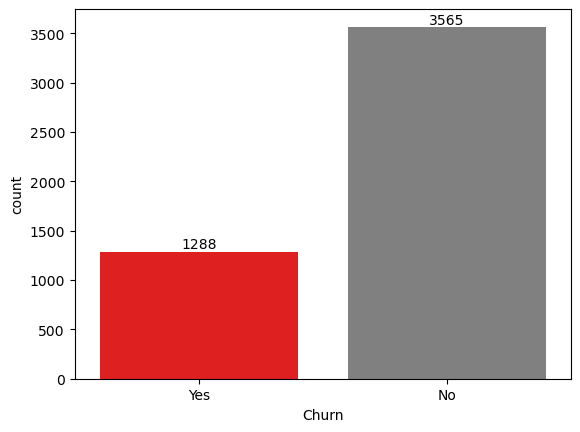

In [14]:
plot = sns.countplot(data=df, x=target, palette=['red','grey'])
for p in plot.patches:
    plot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2,  p.get_height()),
        ha='center',
        va='center',
        xytext=(0,5),
        textcoords='offset points'
    )
plt.show()

In [15]:
round(df[target].value_counts(normalize=True), 2)

Churn
No     0.73
Yes    0.27
Name: proportion, dtype: float64

This dataset proportion is imbalance. Where positive class (churn) was the minority class with target class proportion of 3:1.

## Qualitative features

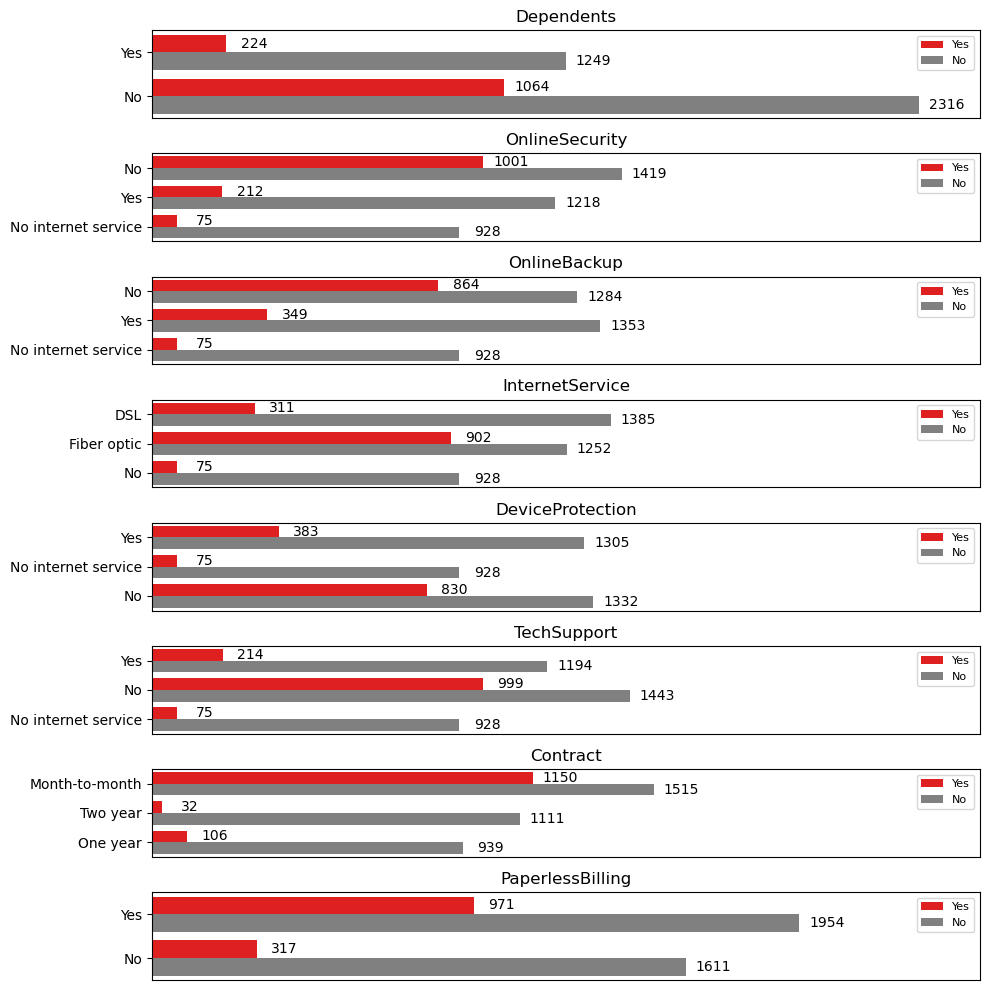

In [16]:
def qualitative_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(10,10))
    for i, feature in enumerate(features):
        if segment_feature:
            plot = sns.countplot(data=df, y=feature, hue=segment_feature, ax=ax[i], palette=['red','grey'])
            ax[i].legend(prop={'size':8}, loc=1)
            ax[i].set_xlabel(None)
            ax[i].set_ylabel(None)
            ax[i].set_title(feature)
            ax[i].set_xlim(0, 2500)
            ax[i].set_xticks([])

            for p in plot.patches[:-2]:
                plot.annotate(format(p.get_width(), '.0f'),
                            (p.get_width(),  p.get_y() + p.get_height() / 2.),
                            ha='center',
                            va='center',
                            xytext=(20,0),
                            textcoords='offset points')

        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()
 
qualitative_plot(
    features=quali_columns,
    df=df,
    segment_feature=target
)

Insight:
- Dependents: Customers who have dependents are most likely to churn (1/3 of them)
- Internet service: Customers who uses fiber optic are most likely to churn (3/7 of them). Customers with no internet service are the same customers with value of 'No internet service' for several columns that already stated before. So, the distribution of churn are exactly the same.
- Online security: Customers who doesn't have online security service are more likely to churn (2/5 of them)
- Online backup: Customers who doesn't have online backup service are more likely to churn (3/7 of them)
- Device protection: Customers who doesn't have device protection service are more likely to churn (2/5 of them)
- Tech support: Customers who doesn't have tech support service are more likely to churn (2/5 of them)
- Contract: Month-to-month customers are most likely to churn (2/5 of them)
- Paperless billing: Customers who use paperless billing are most likely to churn (1/3 of them)

Interesting facts:
- Customers who doesn't take add-on services (online security, online backup, device protection, tech support) are most likely to churn. It is better to recommend these add-on to customer
- Customers who takes month-to-month contract are most likely to churn. This is very different compared to customers with two/one year contract

**Pivoting**

Because we have a lot of qualitative features. We migh get a better ML performance by combining these qualitative features.

In [17]:
for column in quali_columns:
    display(df.pivot_table(index=quali_columns[2], columns=[column, target], aggfunc='size'))

Dependents            No       Yes     
Churn                 No  Yes   No  Yes
OnlineBackup                           
No                   913  723  371  141
No internet service  525   58  403   17
Yes                  878  283  475   66

OnlineSecurity          No        No internet service          Yes       
Churn                   No    Yes                  No   Yes     No    Yes
OnlineBackup                                                             
No                   777.0  732.0                 NaN   NaN  507.0  132.0
No internet service    NaN    NaN               928.0  75.0    NaN    NaN
Yes                  642.0  269.0                 NaN   NaN  711.0   80.0

OnlineBackup             No        No internet service           Yes       
Churn                    No    Yes                  No   Yes      No    Yes
OnlineBackup                                                               
No                   1284.0  864.0                 NaN   NaN     NaN    NaN
No internet service     NaN    NaN               928.0  75.0     NaN    NaN
Yes                     NaN    NaN                 NaN   NaN  1353.0  349.0

InternetService        DSL        Fiber optic            No      
Churn                   No    Yes          No    Yes     No   Yes
OnlineBackup                                                     
No                   689.0  233.0       595.0  631.0    NaN   NaN
No internet service    NaN    NaN         NaN    NaN  928.0  75.0
Yes                  696.0   78.0       657.0  271.0    NaN   NaN

DeviceProtection        No        No internet service          Yes       
Churn                   No    Yes                  No   Yes     No    Yes
OnlineBackup                                                             
No                   758.0  632.0                 NaN   NaN  526.0  232.0
No internet service    NaN    NaN               928.0  75.0    NaN    NaN
Yes                  574.0  198.0                 NaN   NaN  779.0  151.0

TechSupport             No        No internet service          Yes       
Churn                   No    Yes                  No   Yes     No    Yes
OnlineBackup                                                             
No                   804.0  732.0                 NaN   NaN  480.0  132.0
No internet service    NaN    NaN               928.0  75.0    NaN    NaN
Yes                  639.0  267.0                 NaN   NaN  714.0   82.0

Contract            Month-to-month      One year     Two year    
Churn                           No  Yes       No Yes       No Yes
OnlineBackup                                                     
No                             780  806      296  47      208  11
No internet service            265   65      256   6      407   4
Yes                            470  279      387  53      496  17

PaperlessBilling      No       Yes     
Churn                 No  Yes   No  Yes
OnlineBackup                           
No                   485  204  799  660
No internet service  650   47  278   28
Yes                  476   66  877  283

## Quantitative features

Outliers

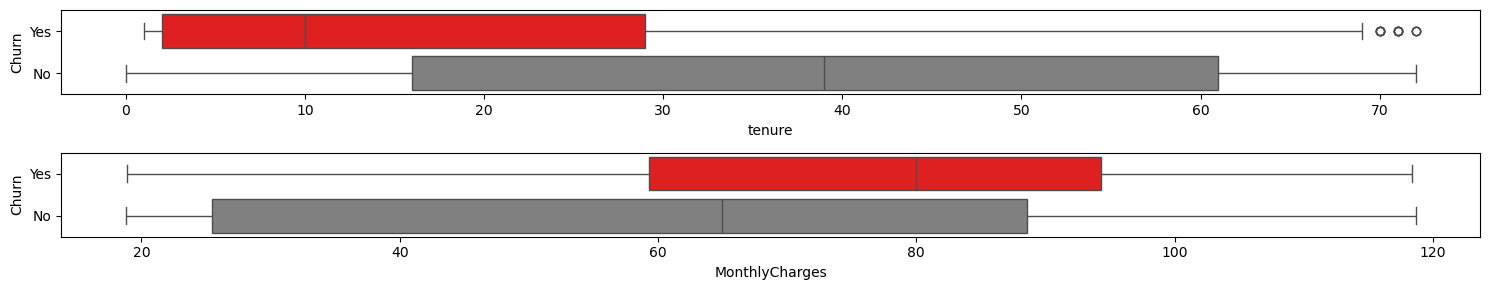

In [18]:
quantitative_dis_plot(
    features=quanti_columns,
    df=df,
    segment_feature=target
)

Insight:
- Tenure: Based on median, customers whose tenure is below 10 months are most likely to churn. Customers whose tenure more than 40 months (+3 years) are most likely to not churn.
- Monthly charges: Based on median, customers whose monthly charges is above 80 are most likely to churn. Customers with low monthly charges (below 65) are most likely to not churn.

<Figure size 20000x500 with 0 Axes>

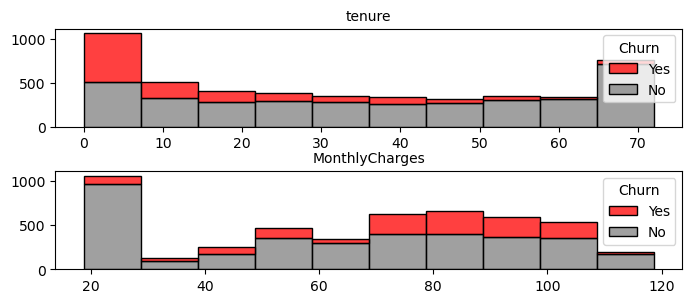

In [19]:
plt.figure(figsize=(200,5))
# sns.set(palette='Set1')

fig, ax = plt.subplots(len(quanti_columns), 1,figsize=(7,3))
plt.tight_layout()
for i, feature in enumerate(quanti_columns):
    sns.histplot(data=df, x=feature, ax=ax[i], bins=10, hue=target, multiple='stack', palette=['red','grey'])
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].set_title(feature, fontsize=10)
plt.show()

Insight:
- Tenure: Customers whose tenure is below 10 months are most likely to churn. Customers whose tenure more than 65 months (+5 years) are most likely to not churn.
- Monthly charges: Customers whose monthly charges is above 70 are most likely to churn. Customers with low monthly charges (below 30) are most likely to not churn.

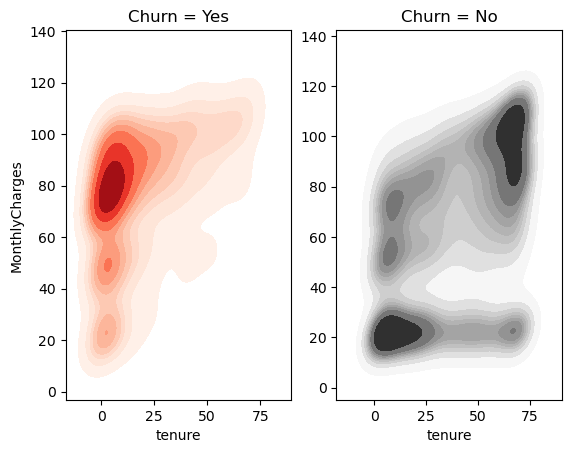

In [20]:
fig, ax = plt.subplots(1, 2)
sns.kdeplot(data=df[df['Churn']=='Yes'], x='tenure', y='MonthlyCharges', 
            color='r', shade=True, shade_lowest=False, cmap='Reds', 
            label='Yes', ax=ax[0])
ax[0].set_title('Churn = Yes')

sns.kdeplot(data=df[df['Churn']=='No'], x='tenure', y='MonthlyCharges', 
            color='b', shade=True, shade_lowest=False, cmap='Greys', 
            label='No', ax=ax[1])
ax[1].set_title('Churn = No')
ax[1].set_ylabel(None)
plt.show()

Insight:
- Left KDE plot: Customers whose tenure is low (below 10 month) and monthly charges is high (above 70) are most likely to churn 
- Right KDE plot: Customers whose tenure is low (below 25 month) and monthly charge is low (below 30) are most likely to not churn. And customers whose tenure is high (above 50 month) and monthly charge is high (above 80) are most likely to not churn

# Data Preprocessing

In [21]:
x = df.drop(columns=target)
y = df[target]

target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

column_names = list(x.columns)

### Feature engineering

**Binning numerical features**

In [22]:
# def bin_tenure(value):
#     if value > 60:
#         bin = 'high'
#     elif value > 10:
#         bin = 'medium'
#     else:
#         bin = 'low'
#     return bin

# x['tenure'] = x['tenure'].apply(bin_tenure)
# quanti_columns.remove('tenure')
# quali_columns.append('tenure')

# def bin_MonthlyCharges(value):
#     if value > 70:
#         bin = 'high'
#     elif value > 30:
#         bin = 'medium'
#     else:
#         bin = 'low'
#     return bin

# x['MonthlyCharges'] = x['MonthlyCharges'].apply(bin_MonthlyCharges)
# quanti_columns.remove('MonthlyCharges')
# quali_columns.append('MonthlyCharges')

# x.head()

In [23]:
# # Replacing 'no internet service' to 'No'
# for column in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']:
#     x[column] = x[column].replace({'No internet service':'No'})

In [24]:
# from sklearn.preprocessing import QuantileTransformer

# # x['tenure'] = x['tenure'].replace(0, 1)
# transformation = QuantileTransformer(output_distribution='normal')
# x_transform = transformation.fit_transform(x[quanti_columns])
# x_transform =  pd.DataFrame(x_transform, columns=quanti_columns)

# x.drop(columns=quanti_columns, inplace=True)
# x = pd.concat([x, x_transform], axis=1)
# x.head()

**Artificial features**

In [25]:
# x['TotalCharges'] = x['MonthlyCharges'] * x['tenure']
# quanti_columns.append('TotalCharges')
# column_names.append('TotalCharges')
# x.head()

**Combining qualitative features**

In [26]:
# col1 = quali_columns[2]
# col2 = quali_columns[-1]

# col_name = col1+'_'+col2
# x[col_name] = x[col1].astype(str) + '_' + x[col2].astype(str)
# x.drop(columns=[col1,col2], axis=1, inplace=True)

# # Correcting qual columns
# quali_columns.append(col_name)
# quali_columns.remove(col1)
# quali_columns.remove(col2)

**Polynomial**

In [27]:
# x.reset_index(drop=True)
# poly = PolynomialFeatures(degree=3, include_bias=False)
# x_poly = pd.DataFrame(poly.fit_transform(x[quanti_columns]))
# x_poly.columns = ['poly'+str(i) for i in range(x_poly.shape[1])]
# x = pd.concat([x.drop(columns=quanti_columns), x_poly], axis=1)
# column_names = list(x.columns)
# x.head()

**PCA**

In [28]:
# pca = PCA(n_components=len(x.columns), random_state=0)
# princ_comp = pca.fit_transform(x)
# var_exp = pca.explained_variance_ratio_.round(3)
# cum_var_exp = np.cumsum(var_exp)

# plt.bar(range(len(x.columns)), var_exp, alpha=0.5, align='center', label='individual explained variance')
# plt.step(range(len(x.columns)), cum_var_exp, where='mid', label='cumulative explained variance')
# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal component index')
# plt.legend(loc='best')
# plt.show()

In [29]:
# pca = PCA(n_components=2, random_state=0)
# princ_comp = pca.fit_transform(x)
# princ_comp_df = pd.DataFrame(princ_comp)
# sns.scatterplot(data=princ_comp_df, x=0, y=1, hue=y)

### Encoding

In [30]:
# # Ordinal encoding
# x['Contract'] = x['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
# quali_columns.remove('Contract')

In [31]:
# One-hot encoding
encoder = ColumnTransformer(
    [
        ('one-hot', OneHotEncoder(drop='first', sparse_output=False), quali_columns)
    ],remainder='passthrough'
)
encoder.set_output(transform='pandas')
x = encoder.fit_transform(x)
x.head( )

,one-hot__Dependents_Yes,one-hot__OnlineSecurity_No internet service,one-hot__OnlineSecurity_Yes,one-hot__OnlineBackup_No internet service,one-hot__OnlineBackup_Yes,one-hot__InternetService_Fiber optic,one-hot__InternetService_No,one-hot__DeviceProtection_No internet service,one-hot__DeviceProtection_Yes,one-hot__TechSupport_No internet service,one-hot__TechSupport_Yes,one-hot__Contract_One year,one-hot__Contract_Two year,one-hot__PaperlessBilling_Yes,remainder__tenure,remainder__MonthlyCharges
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,9,72.90
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14,82.65
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,64,47.85
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,72,69.65
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3,23.60


In [32]:
column_names = list(encoder.get_feature_names_out())
for i in range(len(column_names)):
    column_names[i] = column_names[i].replace('one-hot__', '')
    column_names[i] = column_names[i].replace('remainder__', '')
x.columns = column_names
x.head()

,Dependents_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,tenure,MonthlyCharges
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,9,72.90
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14,82.65
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,64,47.85
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,72,69.65
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3,23.60


**Multiply qualitative with quantitative**

In [33]:
# quanti_columns_encoded = x.loc[:, ~x.columns.isin(quanti_columns)].columns
# for column in quanti_columns_encoded:
#     x[column] = x[column] * x['TotalCharges']
# x.head()

### Feature selection

In [34]:
# Remove duplicates on column 'No internet service' as they have the same value for each row

firts = True
for column in x.columns:
    if 'No internet service' in column:
        if firts:
            firts = False
        else:
            x.drop(columns=column, inplace=True)
            column_names.remove(column)

print('number of column', x.shape[1])
x.head()

number of column 13


,Dependents_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_Yes,InternetService_Fiber optic,InternetService_No,DeviceProtection_Yes,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,tenure,MonthlyCharges
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9,72.90
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,14,82.65
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,64,47.85
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,72,69.65
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3,23.60


In [35]:
# feature_selection = VarianceThreshold(threshold=(0.4 * (1-0.4)))
# feature_selection = SelectKBest(f_classif, k=20)
# x = feature_selection.fit_transform(x)#, y)

**Feature selection for qualitative data**

In [36]:
# Univariate statistics (chi-squared test)

x_cat = x.iloc[:, :-2]
chi2_stats, p_values = chi2(x_cat, y)
chi2_df = pd.DataFrame(
    {
        'column': list(x_cat.columns),
        'p-value': p_values,
        'chi2-stat': chi2_stats
    }
)
chi2_df

,column,p-value,chi2-stat
0,Dependents_Yes,6.790951e-23,97.040913
1,OnlineSecurity_No internet service,1.475787e-42,186.945804
2,OnlineSecurity_Yes,1.089918e-23,100.663941
3,OnlineBackup_Yes,1.713336e-08,31.794996
4,InternetService_Fiber optic,1.876761e-58,259.821573
5,InternetService_No,1.475787e-42,186.945804
6,DeviceProtection_Yes,3.396393e-04,12.838062
7,TechSupport_Yes,5.520074e-22,92.892952
8,Contract_One year,3.371361e-33,144.104218
9,Contract_Two year,7.757098e-74,330.427400


All qualitative features are statistically significant to target variable. Indicated with p-value lower than 0.05 (for 95% condidence level). Thus we'll use all qualiative features.

[]

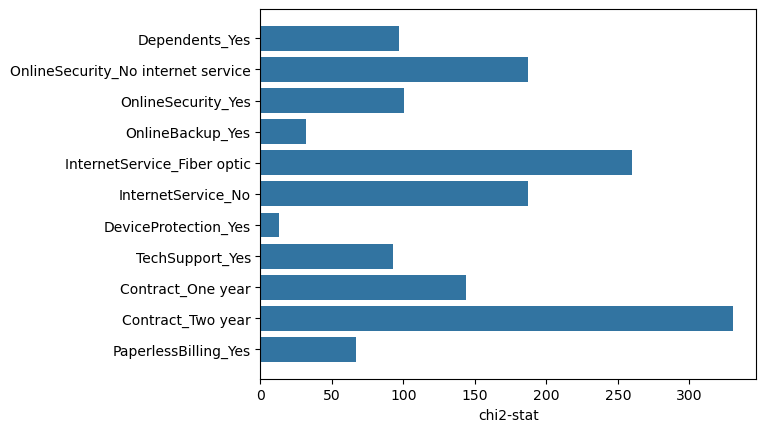

In [37]:
sns.barplot(data=chi2_df, x='chi2-stat', y='column')
plt.ylabel(None)
plt.plot()

Dropping DeviceProtection_Yes and/or OnlineBackup_Yes might result in a better model performance because it has a relatively lower chi2 value.

In [38]:
x.drop(['DeviceProtection_Yes'], axis=1, inplace=True)
column_names.remove('DeviceProtection_Yes')

print('number of column', x.shape[1])
x.head()

number of column 12


,Dependents_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_Yes,InternetService_Fiber optic,InternetService_No,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,tenure,MonthlyCharges
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9,72.90
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,14,82.65
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,64,47.85
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,72,69.65
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,23.60


**Feature selection for quantitative data**

In [39]:
# Univariate statistics (f test)

x_num = x.iloc[:, -2:]
f_stats, p_values = f_classif(x_num, y)
ftest_df = pd.DataFrame(
    {
        'column': list(x_num.columns),
        'p-value': p_values,
        'f-stat': f_stats
    }
)
ftest_df

,column,p-value,f-stat
0,tenure,3.123697e-149,726.504745
1,MonthlyCharges,1.734247e-42,190.281008


All quantitative features are statistically significant to target variable. Indicated with p-value lower than 0.05 (for 95% condidence level). Thus we'll use all quantitative features.

[]

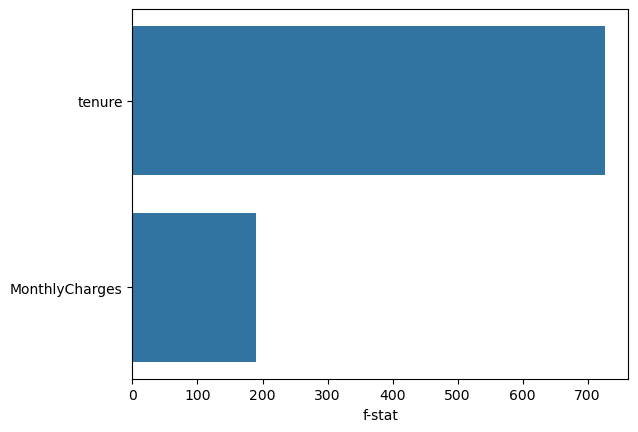

In [40]:
sns.barplot(data=ftest_df, x='f-stat', y='column')
plt.ylabel(None)
plt.plot()

### Train-test split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    stratify=y,
    random_state=0
)

In [42]:
display(x_train.head(), x_test.head())

,Dependents_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_Yes,InternetService_Fiber optic,InternetService_No,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,tenure,MonthlyCharges
3738,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,67,50.95
3311,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,71,85.45
2379,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,15,26.35
261,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,31,89.45
107,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,36,84.10


,Dependents_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_Yes,InternetService_Fiber optic,InternetService_No,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,tenure,MonthlyCharges
4265,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,15,83.20
159,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18,78.55
281,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,72,97.85
225,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18,45.65
1345,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,72,112.60


## Balancing

In [43]:
pd.Series(y_train).value_counts()

0    2852
1    1030
Name: count, dtype: int64

In [44]:
rus = RandomUnderSampler(random_state=0) #, categorical_features=list(x_train.columns[:-2])) #.TomekLinks()
x_train, y_train = rus.fit_resample(x_train, y_train)
pd.Series(y_train).value_counts()

0    1030
1    1030
Name: count, dtype: int64

## Scaling

In [45]:
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))
# x_train.columns = column_names
# x_test.columns = column_names
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2060.0,0.260194,0.438847,0.0,0.000000,0.000000,1.000000,1.0
1,2060.0,0.155340,0.362316,0.0,0.000000,0.000000,0.000000,1.0
2,2060.0,0.248058,0.431991,0.0,0.000000,0.000000,0.000000,1.0
3,2060.0,0.328641,0.469833,0.0,0.000000,0.000000,1.000000,1.0
4,2060.0,0.533981,0.498965,0.0,0.000000,1.000000,1.000000,1.0
5,2060.0,0.155340,0.362316,0.0,0.000000,0.000000,0.000000,1.0
6,2060.0,0.245631,0.430565,0.0,0.000000,0.000000,0.000000,1.0
7,2060.0,0.169417,0.375211,0.0,0.000000,0.000000,0.000000,1.0
8,2060.0,0.171845,0.377337,0.0,0.000000,0.000000,0.000000,1.0
9,2060.0,0.657282,0.474734,0.0,0.000000,1.000000,1.000000,1.0


# Modeling

### Algorithm selection

In [46]:
metric = 'F2-score'
beta = 2
scorer = make_scorer(fbeta_score, beta=beta)

y_test_decoded = target_encoder.inverse_transform(y_test)

In [47]:
def evaluate_model(y_true, y_pred):
    print(f'F2-score: {round(fbeta_score(y_true, y_pred, beta=beta, pos_label="Yes"), 2)}\n')
    print(classification_report(y_true, y_pred))

    labels = ['No', 'Yes']
    cnf_matrix = confusion_matrix(y_true, y_pred, labels=labels)
    cnf_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
    plt.figure(figsize=(3,1))
    sns.heatmap(cnf_matrix_df, annot=True, annot_kws={'size': 7}, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=7)
    plt.xlabel('Predicted label', fontsize=7)
    plt.show()

In [48]:
logreg = LogisticRegression(random_state=0)
sgd = SGDClassifier(random_state=0)
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier(random_state=0)
gauss = GaussianProcessClassifier(random_state=0)

svc = SVC(random_state=0)
svc_nu = NuSVC(random_state=0)
svc_lin = LinearSVC(random_state=0)

nb_gaus = GaussianNB()
nb_multi = MultinomialNB()
nb_com = ComplementNB()
nb_ber = BernoulliNB()

boost_g = GradientBoostingClassifier(random_state=0)
boost_hg = HistGradientBoostingClassifier(random_state=0)
boost_xg = XGBClassifier()
boost_ada = AdaBoostClassifier(random_state=0)

boost_ada_nb = AdaBoostClassifier(random_state=0, estimator=nb_gaus, algorithm='SAMME')
boost_ada_svc = AdaBoostClassifier(random_state=0, estimator=svc_lin, algorithm='SAMME')
boost_ada_sgd = AdaBoostClassifier(random_state=0, estimator=sgd, algorithm='SAMME')
boost_ada_logreg = AdaBoostClassifier(random_state=0, estimator=logreg)

rforest = RandomForestClassifier(random_state=0)
xtree = ExtraTreesClassifier(random_state=0)
neural = MLPClassifier(random_state=0)

hard_voting = VotingClassifier([('logreg', logreg),('dtree', dtree),('knn', knn),('nb_gaus', nb_gaus)], voting='hard')
soft_voting = VotingClassifier([('logreg', logreg),('dtree', dtree),('knn', knn),('nb_gaus', nb_gaus)], voting='soft')
stacking =  StackingClassifier([('logreg', logreg),('dtree', dtree),('knn', knn),('nb_gaus', nb_gaus)])

rus_boost = RUSBoostClassifier(random_state=0)
easy_ensemble = EasyEnsembleClassifier(random_state=0)
balance_bagging = BalancedBaggingClassifier(random_state=0)
balance_rforest = BalancedRandomForestClassifier(random_state=0)

models = [
    logreg, sgd, knn, dtree, gauss, 
    svc_lin, # svc, svc_nu, 
    nb_gaus, # nb_multi, nb_com, nb_ber,
    boost_g, boost_hg, boost_xg, boost_ada, 
    # boost_ada_nb, boost_ada_svc, boost_ada_sgd, boost_ada_logreg,
    rforest, xtree, neural, 
    hard_voting, soft_voting, stacking
    # rus_boost, easy_ensemble, balance_bagging, balance_rforest,
]

def get_var_name(var):
    for name, value in globals().items():
        if value is var:
            return name

In [49]:
df_algo = pd.DataFrame(
    {
        'model': [],
        'train score mean': [],
        'train score std': [],
        'test  score': [],
        'score diff': []
    }
)
def add_df_algo(model, train_score_mean, train_score_std, test_score):
    diff = abs(train_score_mean - test_score)
    df_algo.loc[len(df_algo)] = [model, round(train_score_mean,4), round(train_score_std,4), round(test_score,4), round(diff,4)]
  
for model in models:
    skfold = StratifiedKFold(n_splits=5)
    model_cv = cross_val_score(
        estimator = model,
        X = x_train,
        y = y_train,
        cv = skfold,
        scoring = scorer,
        error_score = 'raise'
    )
    
    model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    test_score = fbeta_score(y_test, y_test_pred, beta=beta)
    add_df_algo(get_var_name(model), model_cv.mean(), model_cv.std(), test_score)

df_algo.sort_values(by='test  score', ascending=False)

,model,train score mean,train score std,test score,score diff
1,sgd,0.7742,0.0388,0.7632,0.0109
6,nb_gaus,0.8078,0.0157,0.7532,0.0546
10,boost_ada,0.7911,0.0125,0.7402,0.0508
5,svc_lin,0.7865,0.0221,0.7382,0.0484
0,logreg,0.7845,0.0248,0.7338,0.0507
15,soft_voting,0.7995,0.0149,0.7213,0.0783
16,stacking,0.7784,0.0145,0.7163,0.0621
13,neural,0.7824,0.0204,0.7113,0.0712
4,gauss,0.7709,0.0184,0.7014,0.0695
7,boost_g,0.7715,0.0237,0.7011,0.0703


The top 3 models which are: 
1. Stochastic gradient descent (sgd)
2. Gaussian naive bayes (nb_gaus)
3. Ada Boost (boost_ada)

These models will be tuned to achieve their top performance.

### Hyperparameter tuning

In [50]:
# Stochastic gradient descent (SGD)
sgd_param_grid = {
    'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 
             'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 
             'squared_epsilon_insensitive'],
    'penalty': ['l2','l1','elasticnet',None],
    'alpha': [10**i for i in range(0,-7,-1)],
    'fit_intercept': [True, False],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    # 'class_weight': [None, 'balanced', {0:50,1:1}, {0:5,1:1}, {0:1,1:1}, {0:1,1:5}, {0:1,1:50}]
}
sgd = SGDClassifier(random_state=0)
sgd_tuning = GridSearchCV(
    estimator=sgd,
    param_grid=sgd_param_grid,
    cv=5,
    scoring=scorer,
    n_jobs=-1
)
# sgd_tuning.fit(x_train, y_train)

# print(f'Best score: {round(sgd_tuning.best_score_, 4)}')
# print(f'Best param: {sgd_tuning.best_params_}')

After tuning, the training f2-score got better. From 0.7742 to 0.8369.

In [51]:
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
y_pred = target_encoder.inverse_transform(y_pred)

best_sgd = SGDClassifier(alpha=0.0001, fit_intercept=True, learning_rate='optimal', loss='epsilon_insensitive', penalty='l2')
best_sgd.fit(x_train, y_train)
y_pred_tune = best_sgd.predict(x_test)
y_pred_tune = target_encoder.inverse_transform(y_pred_tune)

Score before tuning: 0.763
Score after tuning: 0.759


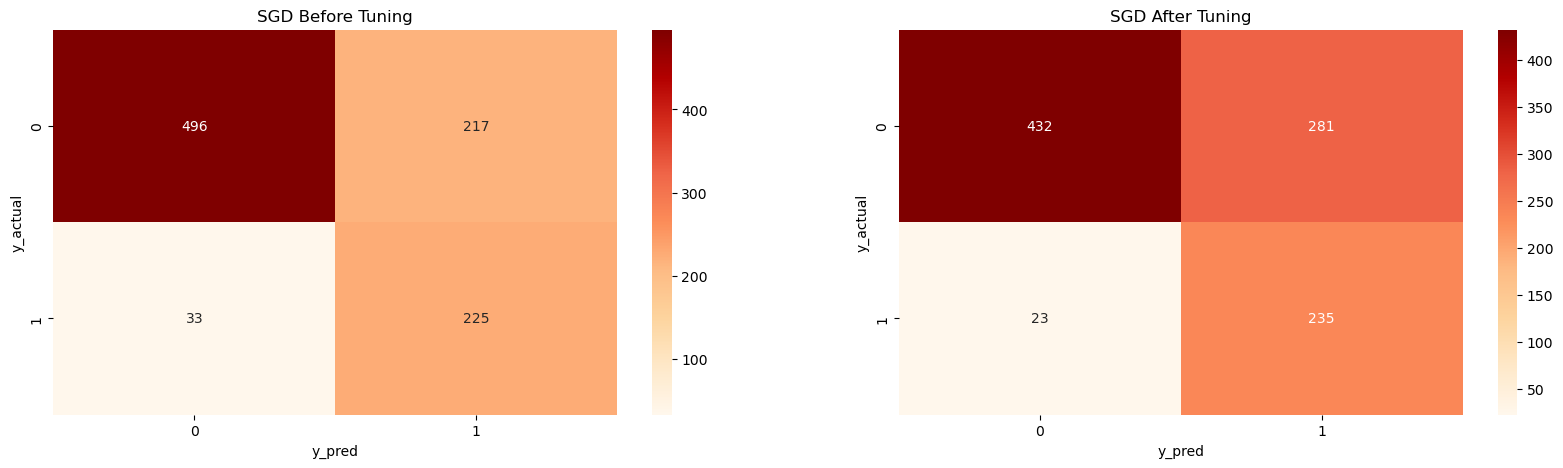

In [52]:
print(f'Score before tuning: {round(fbeta_score(y_test_decoded, y_pred, beta=beta, pos_label="Yes"), 3)}')
print(f'Score after tuning: {round(fbeta_score(y_test_decoded, y_pred_tune, beta=beta, pos_label="Yes"), 3)}')

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test_decoded, y_pred), annot=True, fmt='.0f', cmap='OrRd')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('SGD Before Tuning')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test_decoded, y_pred_tune), annot=True, fmt='.0f', cmap='OrRd')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('SGD After Tuning')

plt.show()

On the test-set, F2-score after tuning got lower. This means that the model got overfitted after tuning.

In [53]:
# Gaussian naive bayes
nb_gaus_param_grid = {
    'var_smoothing': [10**i for i in range(0,-20,-1)]
}
nb_gaus = GaussianNB()
nb_gaus_tuning = GridSearchCV(
    estimator=nb_gaus,
    param_grid=nb_gaus_param_grid,
    cv=5,
    scoring=scorer,
    n_jobs=-1
)
# nb_gaus_tuning.fit(x_train, y_train)

# print(f'Best score: {nb_gaus_tuning.best_score_}')
# print(f'Best param: {nb_gaus_tuning.best_params_}')

After tuning, the training f2-score got better. From 0.8078 to 0.8449.

In [54]:
nb_gaus.fit(x_train, y_train)
y_pred = nb_gaus.predict(x_test)
y_pred = target_encoder.inverse_transform(y_pred)

best_nb_gaus = GaussianNB(var_smoothing=1)
best_nb_gaus.fit(x_train, y_train)
y_pred_tune = best_nb_gaus.predict(x_test)
y_pred_tune = target_encoder.inverse_transform(y_pred_tune)

Score before tuning: 0.753
Score after tuning: 0.741


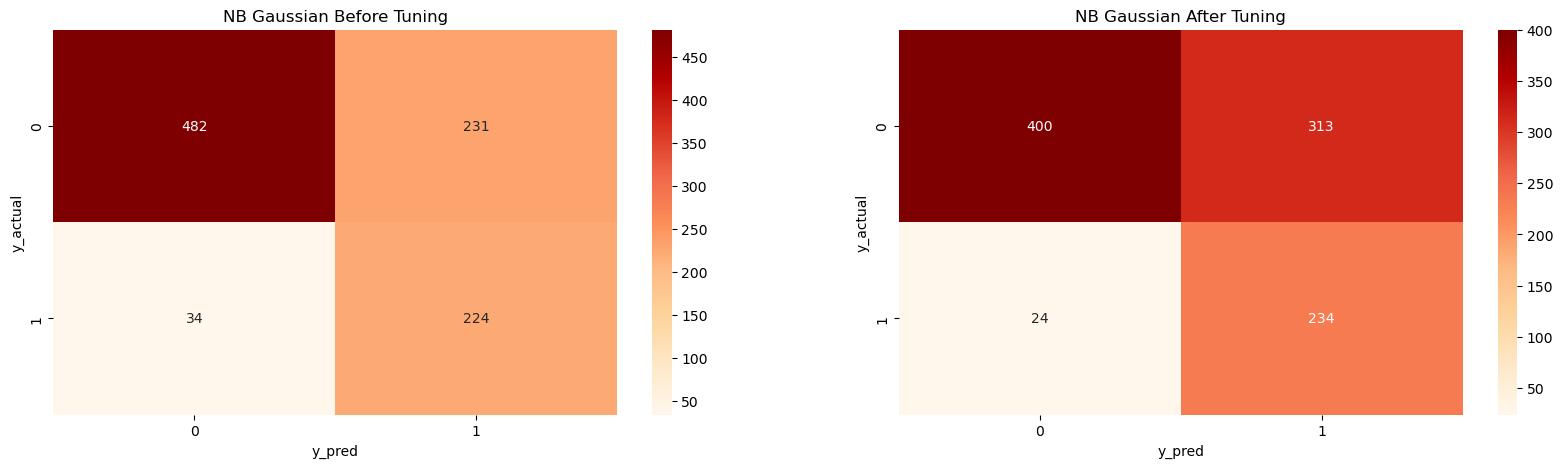

In [55]:
print(f'Score before tuning: {round(fbeta_score(y_test_decoded, y_pred, beta=beta, pos_label="Yes"), 3)}')
print(f'Score after tuning: {round(fbeta_score(y_test_decoded, y_pred_tune, beta=beta, pos_label="Yes"), 3)}')

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test_decoded, y_pred), annot=True, fmt='.0f', cmap='OrRd')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('NB Gaussian Before Tuning')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test_decoded, y_pred_tune), annot=True, fmt='.0f', cmap='OrRd')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('NB Gaussian After Tuning')

plt.show()

On the test-set, F2-score after tuning got lower. This means that the model got overfitted after tuning as well.

In [56]:
# Ada Boost (boost_ada)
boost_ada_param_grid = {
    'n_estimators' : [50, 100, 150, 200, 250],
    'learning_rate': [10**i for i in range(-10,1,1)]
}
boost_ada = AdaBoostClassifier(random_state=0)
boost_ada_tuning = GridSearchCV(
    estimator=boost_ada,
    param_grid=boost_ada_param_grid,
    cv=5,
    scoring=scorer,
    n_jobs=-1
)
boost_ada_tuning.fit(x_train, y_train)

print(f'Best score: {round(boost_ada_tuning.best_score_, 4)}')
print(f'Best param: {boost_ada_tuning.best_params_}')

Best score: 0.8651
Best param: {'learning_rate': 1e-10, 'n_estimators': 50}


After tuning, the training f2-score got better. From 0.7911 to 0.8651   .

In [57]:
boost_ada.fit(x_train, y_train)
y_pred = boost_ada.predict(x_test)
y_pred = target_encoder.inverse_transform(y_pred)

best_boost_ada = AdaBoostClassifier(learning_rate=1e-10, n_estimators=50)
best_boost_ada.fit(x_train, y_train)
y_pred_tune = best_boost_ada.predict(x_test)
y_pred_tune = target_encoder.inverse_transform(y_pred_tune)

Score before tuning: 0.74
Score after tuning: 0.702


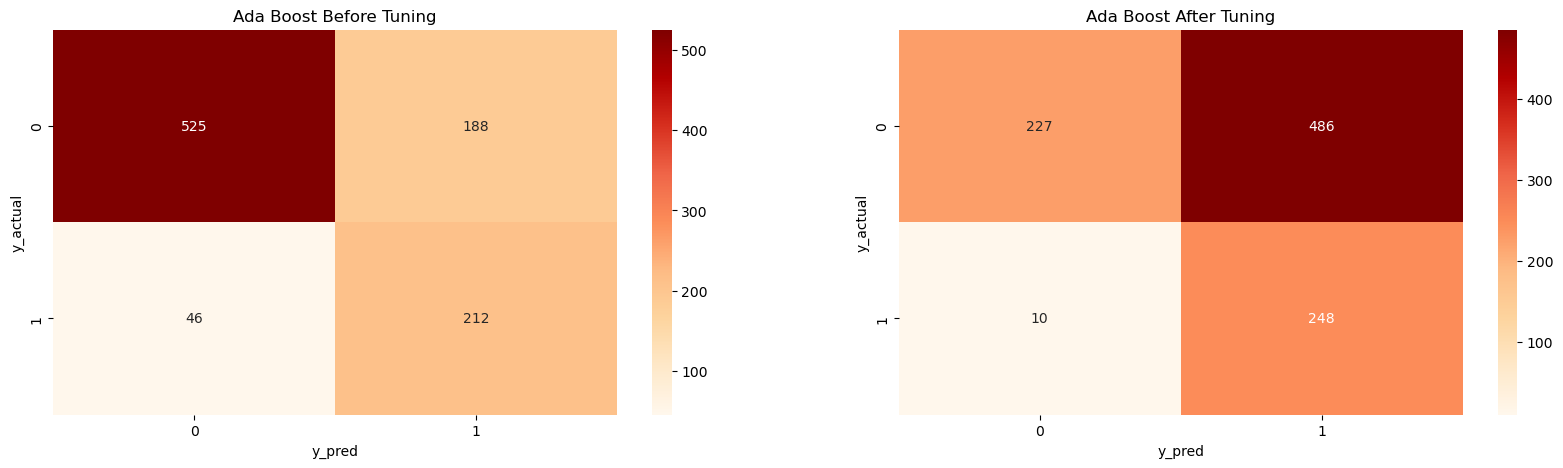

In [58]:
print(f'Score before tuning: {round(fbeta_score(y_test_decoded, y_pred, beta=beta, pos_label="Yes"), 3)}')
print(f'Score after tuning: {round(fbeta_score(y_test_decoded, y_pred_tune, beta=beta, pos_label="Yes"), 3)}')

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test_decoded, y_pred), annot=True, fmt='.0f', cmap='OrRd')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('Ada Boost Before Tuning')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test_decoded, y_pred_tune), annot=True, fmt='.0f', cmap='OrRd')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('Ada Boost After Tuning')

plt.show()

On the test-set, F2-score after tuning got lower. This means that the model got overfitted after tuning as well.

Best model was Stochastic Gradient Descent **(SGD) before tuning** the hyperparameter which got train F2-score of 0.7742 and test F2-score of 0.7632

### Feature Importance

We will try to improve the model performance of SGD by looking at the feature importance.

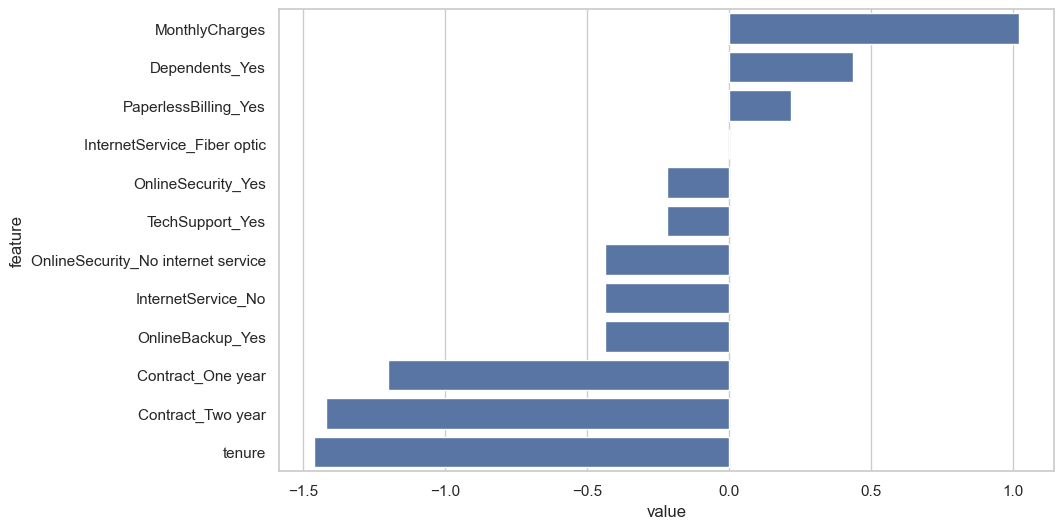

In [59]:
# Feature importance
df_feature_importance = pd.DataFrame(
    {
        'feature': column_names,
        'value': sgd.coef_[0]
    }
).sort_values('value', ascending=False)

# df_feature_importance
plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')
sns.barplot(data=df_feature_importance, x='value', y='feature',
            orient='h') #, palette='OrRd')
plt.show()

In [60]:
df_feature_importance

,feature,value
11,MonthlyCharges,1.018362e+00
0,Dependents_Yes,4.364954e-01
9,PaperlessBilling_Yes,2.182477e-01
4,InternetService_Fiber optic,-2.575532e-15
2,OnlineSecurity_Yes,-2.182477e-01
6,TechSupport_Yes,-2.182477e-01
1,OnlineSecurity_No internet service,-4.364954e-01
5,InternetService_No,-4.364954e-01
3,OnlineBackup_Yes,-4.364954e-01
7,Contract_One year,-1.200362e+00


We will try to improve this model by removing less importance features

In [61]:
all = [i for i in range(16)]
selected_features = list(df_feature_importance.index)

# Remove less importance features
for i in [9,4,2,6]:
    selected_features.remove(i)

sgd_feat = SGDClassifier(random_state=0)
sgd_feat_cv = cross_val_score(
                estimator = sgd_feat,
                X = x_train[selected_features],
                y = y_train,
                cv = skfold,
                scoring = scorer,
                error_score = 'raise'
              )
sgd_feat.fit(x_train[selected_features], y_train)
y_pred_feat = sgd_feat.predict(x_test[selected_features])

sgd_cv = cross_val_score(
            estimator = sgd,
            X = x_train,
            y = y_train,
            cv = skfold,
            scoring = scorer,
            error_score = 'raise'
          )
y_pred = sgd.predict(x_test)

print(f"""
Before removing low coef features
valid score: {round(sgd_cv.mean(), 4)}
test  score: {round(fbeta_score(y_test, y_pred, beta=beta), 4)}      

After removing low coef features
valid score: {round(sgd_feat_cv.mean(), 4)}
test  score: {round(fbeta_score(y_test, y_pred_feat, beta=beta), 4)}
""")


Before removing low coef features
valid score: 0.7742
test  score: 0.7632      

After removing low coef features
valid score: 0.8008
test  score: 0.7531



Removing features with low coefficient was not improving the test score (overfit). So, we won't remove any features.

### Adjusting threshold

In [62]:
# thresholds = [i/100 for i in range(20,81)]
# scores = []
# best_score = 0

# for threshold in thresholds:
#     y_train_pred_prob = sgd.predict_proba(x_train)[:, 1]
#     y_train_pred = np.where(y_train_pred_prob>threshold, 1, 0)

#     score = fbeta_score(y_train, y_train_pred, beta=beta)
#     scores.append(score)

#     if score > best_score:
#         best_score = round(score, 3)
#         best_threshold = threshold

# print(f'Best {metric}\t: {best_score}')
# print(f'Best threshold\t: {best_threshold}')

We can't tune the threshold because of 'Hinge' which is used as the loss parameter doesn't provide the probability of prediction.

### Save final model

In [63]:
# Creating pipeline

x = df.drop(columns=target)
y = df[target]
# y = target_encoder.transform(y)

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    stratify=y,
    random_state=0
)

class drop_columns():
    def __init__(self, columns):
        self.columns=columns
    def transform(self, x, y=None):
        return x.drop(self.columns, axis=1)
    def fit(self, x, y=None):
        return self
drop_columns_list = ['one-hot__OnlineBackup_No internet service', 'one-hot__DeviceProtection_No internet service', 
                     'one-hot__TechSupport_No internet service', 'one-hot__DeviceProtection_Yes']

model_final = SGDClassifier(random_state=0)
pipeline_model_final = Pipeline(
    [
        ('encoder', encoder),
        ('feature selection', drop_columns(drop_columns_list)),
        ('resample', rus),
        ('scaler', scaler),
        ('model', model_final)
    ]
)
pipeline_model_final.fit(x_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one-hot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling'])])),
                ('feature selection',
                 <__main__.drop_columns object at 0x000001E2EDDC8D50>),
                ('resample', RandomUnderSampler(random_state=0)),
                ('scaler', MinMaxScaler()),
                ('model', SGDClassifier(random_state=0))])

In [64]:
y_test_encoded = target_encoder.transform(y_test)

y_pred = pipeline_model_final.predict(x_test)
y_pred_encoded = target_encoder.transform(y_pred)

print(f"test  score: {round(fbeta_score(y_test_encoded, y_pred_encoded, beta=beta), 4)}")

test  score: 0.7632


In [65]:
# Save the pipeline model final
filename = 'models/pipeline_model_final.pkl'
pickle.dump(model_final, open(filename, 'wb'))

In [76]:
# Export test dataset
x_test.to_csv('data/telco_churn_test.csv', index=None)

In [72]:
# # Create requirement file that list all required libraries
# !pip freeze > requirements.txt

Testing on real-time prediction

In [66]:
x_test.iloc[:3,:]

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges
4265,No,15,No,Yes,Fiber optic,No,No,Month-to-month,Yes,83.20
159,No,18,No,No,Fiber optic,No,No,Month-to-month,No,78.55
281,No,72,No,No,Fiber optic,Yes,No,Two year,Yes,97.85


In [67]:
list(y_test[:10])

['No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No']

In [68]:
list(pipeline_model_final.predict(x_test.iloc[:10,:]))

['Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No']

## Explainable AI

In [70]:
explainer = shap.Explainer(
    pipeline_model_final[-1].predict, 
    pipeline_model_final[:-1].transform(x_test)
)

shap_values = explainer(pipeline_model_final[:-1].transform(x_test))

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mNo implementation of function Function(<built-in function setitem>) found for signature:
 
 >>> setitem(array(float64, 1d, C), slice<a:b>, array([unichr x 3], 1d, C))
 
There are 16 candidate implementations:
[1m   - Of which 16 did not match due to:
   Overload of function 'setitem': File: <numerous>: Line N/A.
     With argument(s): '(array(float64, 1d, C), slice<a:b>, array([unichr x 3], 1d, C))':[0m
[1m    No match.[0m
[0m
[0m[1mDuring: typing of staticsetitem at C:\Users\MSI GF63\AppData\Roaming\Python\Python311\site-packages\shap\utils\_masked_model.py (406)[0m
[1m
File "..\..\..\..\..\Users\MSI GF63\AppData\Roaming\Python\Python311\site-packages\shap\utils\_masked_model.py", line 406:[0m
[1mdef _build_fixed_single_output(averaged_outs, last_outs, outputs, batch_positions, varying_rows, num_varying_rows, link, linearizing_weights):
    <source elided>
            if num_varying_rows[i] == sample_count:
[1m                last_outs[:] = outputs[batch_positions[i]:batch_positions[i+1]]
[0m                [1m^[0m[0m


In [352]:
row_number = 0
shap.plots.bar(shap_values[row_number], max_display=x_test.shape[1])

TypeError: can only concatenate str (not "int") to str

In [416]:
# Shap values to explain all features in train set
explainer_train = shap.TreeExplainer(
    model = model_final,
    data = x_train,
    feature_perturbation = 'interventional',
    model_output = 'probability'
)
shap_values = explainer_train.shap_values(x_train)

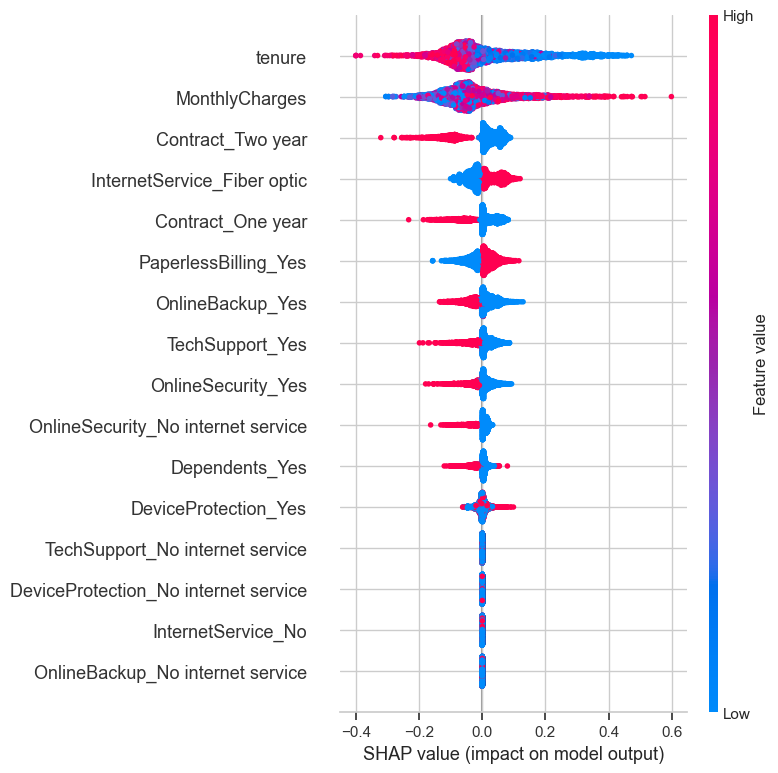

In [417]:
shap.summary_plot(
    shap_values,
    x_train,
    # feature_names=list_features
)

In [418]:
# shap js
def shap_plot(idx, model, dataset):
    explainer_model = shap.TreeExplainer(model)
    shap_values_model = explainer_model.shap_values(dataset)
    p = shap.force_plot(explainer_model.expected_value, shap_values_model[idx], dataset.iloc[[idx]])
    return p
shap.initjs()

In [438]:
# let's compare the real result
row_number = 1
print(f'The prediction of this customer is: {'Churn' if y_test[i]==1 else 'Not Churn'} --> from y_test')

shap_plot(
    row_number,
    model_final,
    x_test
)

The prediction of this customer is: Not Churn --> from y_test


In [442]:
x_train

,Dependents_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,tenure,MonthlyCharges
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.930556,0.321983
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.986111,0.667501
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.208333,0.075613
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.430556,0.707561
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.500000,0.653981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.583333,0.010015
3878,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.250000,0.310966
3879,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.364046
3880,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.069444,0.614422


In [448]:
# LIME
explainer = lime_tabular.LimeTabularExplainer(
    training_data = x_train.values,
    feature_names = column_names,
    class_names = ['Not Churn', 'Churn'],
    mode = 'classification' 
)
explainer

The prediction of this customer is: Churn --> from y_test


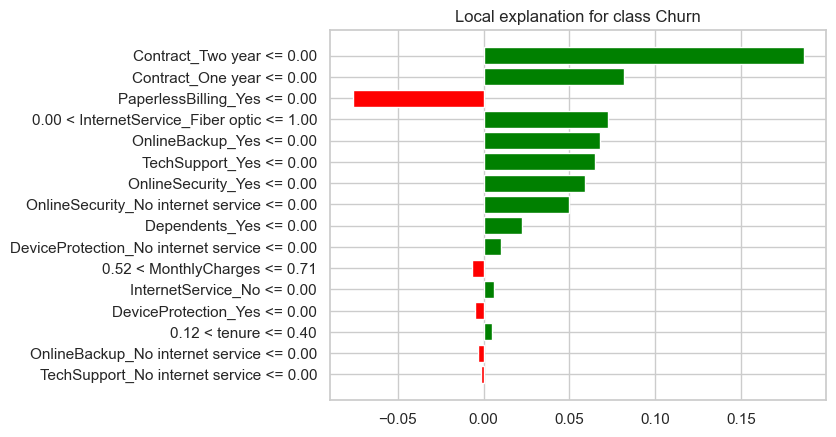

In [450]:
# lime observation using pyplot figure
i = 1
print(f'The prediction of this customer is: {'Churn' if y_test[i]==1 else 'Not Churn'} --> from y_test')

exp = explainer.explain_instance(
    x_test.iloc[i],
    model_final.predict_proba,
    num_features=len(column_names)
)

exp.as_pyplot_figure()
plt.show()

In [452]:
# lime observation
i = 0
print(f'The prediction of this customer is: {'Churn' if y_test[i]==1 else 'Not Churn'} --> from y_test')

exp = explainer.explain_instance(
    x_test.iloc[i],
    model_final.predict_proba,
    num_features=len(column_names)
)

exp.show_in_notebook(show_table=True)

The prediction of this customer is: Not Churn --> from y_test
